In [61]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [62]:
# step 1: data
a1= torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], dtype=torch.float32, requires_grad=True)
a1

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20.], requires_grad=True)

In [63]:
a2= torch.randint(40,60,size=(20,), dtype=torch.float32, requires_grad=True)
a2

tensor([56., 40., 46., 53., 56., 44., 49., 57., 50., 59., 53., 50., 48., 44.,
        57., 43., 40., 51., 51., 56.], requires_grad=True)

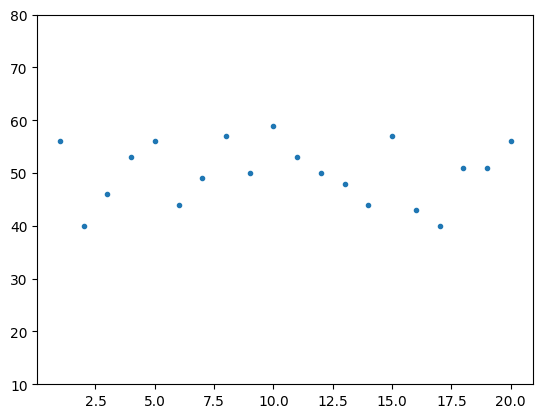

In [64]:
a1_np = a1.detach().numpy()
a2_np = a2.detach().numpy()

plt.plot(a1_np, a2_np, '.')
plt.ylim(10, 80)
plt.show()

In [68]:
# Step 2: modeling
class reg_model(nn.Module):
    def __init__(self):
        super(reg_model, self).__init__()
        self.linear=nn.Linear(20,1)
        
    def forward(self, x):
        return self.linear(x)

model = reg_model()

In [69]:
# Step 3: Loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

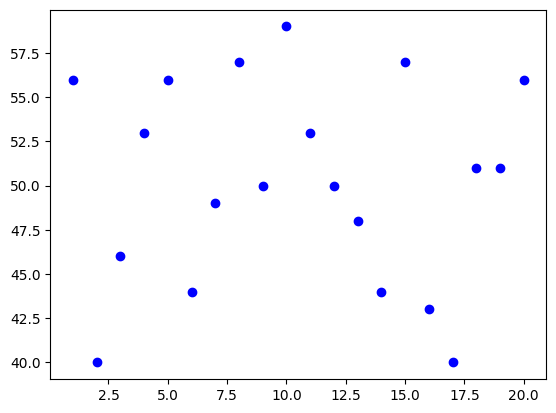

In [74]:
epochs=1000

for epoch in range(epochs):
    # forward pass
    y_pred = model(a1)

    # loss calculation
    loss = criterion(y_pred, a2)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Step 5: Get predictions
with torch.no_grad():
    y_pred_nn = model(a1).numpy()

# Step 6: Plotting the data and the regression line
plt.scatter(a1_np, a2_np, color='blue', label='Data points')
plt.plot(a1, y_pred_nn, color='red', label='Fitted line (NN)')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.title('Linear Regression using Neural Network (PyTorch)')
# plt.show()

# # Getting the learned parameters
# intercept_nn = model.linear.bias.item()
# coefficient_nn = model.linear.weight.item()

# print(f"Intercept (β₀) from Neural Network: {intercept_nn}")
# print(f"Coefficient (β₁) from Neural Network: {coefficient_nn}")